In [272]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [273]:
data = 'https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv'
!wget $data

--2025-10-07 19:01:14--  https://raw.githubusercontent.com/alexeygrigorev/datasets/master/car_fuel_efficiency.csv
Resolving raw.githubusercontent.com (raw.githubusercontent.com)... 185.199.110.133, 185.199.111.133, 185.199.108.133, ...
Connecting to raw.githubusercontent.com (raw.githubusercontent.com)|185.199.110.133|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 874188 (854K) [text/plain]
Saving to: ‘car_fuel_efficiency.csv.1’

car_fuel_efficiency 100%[===================>] 853.70K  --.-KB/s    in 0.008s  

2025-10-07 19:01:14 (104 MB/s) - ‘car_fuel_efficiency.csv.1’ saved [874188/874188]



In [274]:
df = pd.read_csv('car_fuel_efficiency.csv')

In [275]:
df

,engine_displacement,num_cylinders,horsepower,vehicle_weight,acceleration,model_year,origin,fuel_type,drivetrain,num_doors,fuel_efficiency_mpg
0,170,3.0,159.0,3413.433759,17.7,2003,Europe,Gasoline,All-wheel drive,0.0,13.231729
1,130,5.0,97.0,3149.664934,17.8,2007,USA,Gasoline,Front-wheel drive,0.0,13.688217
2,170,NaN,78.0,3079.038997,15.1,2018,Europe,Gasoline,Front-wheel drive,0.0,14.246341
3,220,4.0,NaN,2542.392402,20.2,2009,USA,Diesel,All-wheel drive,2.0,16.912736
4,210,1.0,140.0,3460.870990,14.4,2009,Europe,Gasoline,All-wheel drive,2.0,12.488369
...,...,...,...,...,...,...,...,...,...,...,...
9699,140,5.0,164.0,2981.107371,17.3,2013,Europe,Diesel,Front-wheel drive,NaN,15.101802
9700,180,NaN,154.0,2439.525729,15.0,2004,USA,Gasoline,All-wheel drive,0.0,17.962326
9701,220,2.0,138.0,2583.471318,15.1,2008,USA,Diesel,All-wheel drive,-1.0,17.186587
9702,230,4.0,177.0,2905.527390,19.4,2011,USA,Diesel,Front-wheel drive,1.0,15.331551


In [276]:
x = df[['engine_displacement','horsepower','vehicle_weight','model_year','fuel_efficiency_mpg']]

<Axes: xlabel='fuel_efficiency_mpg', ylabel='Count'>

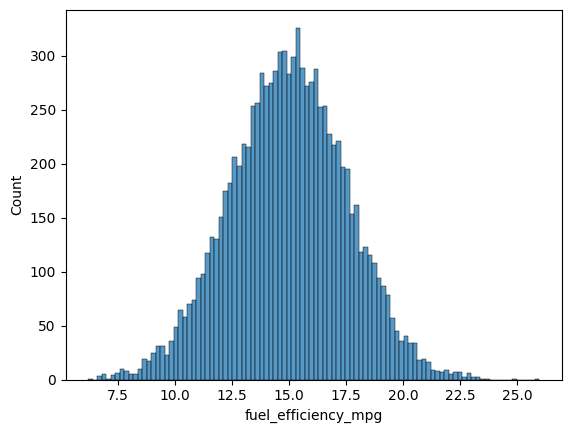

In [277]:
sns.histplot(x.fuel_efficiency_mpg, bins = 100)

### Question 1

In [278]:
x.isnull().sum()

engine_displacement      0
horsepower             708
vehicle_weight           0
model_year               0
fuel_efficiency_mpg      0
dtype: int64

### Question 2

In [279]:
x.horsepower.median()

149.0

### Dataset Split and Preparation

In [280]:
n = len(x)

n_val = int(n * 0.2)
n_test = int(n * 0.2)
n_train = n - n_val - n_test

In [281]:
x_train = x.iloc[:n_train]
x_val = x.iloc[n_train:n_train+n_val]
x_test = x.iloc[n_train+n_val:]

In [282]:
def data_shuffle(seed):
    global x_train, x_val, x_test
    
    idx = np.arange(n)
    np.random.seed(seed)
    np.random.shuffle(idx)
    
    x_train = x.iloc[idx[:n_train]]
    x_val = x.iloc[idx[n_train:n_train+n_val]]
    x_test = x.iloc[idx[n_train+n_val:]]
    
    x_train = x_train.reset_index(drop=True)
    x_val = x_val.reset_index(drop=True)
    x_test = x_test.reset_index(drop=True)

In [283]:
data_shuffle(42)
x_train

,engine_displacement,horsepower,vehicle_weight,model_year,fuel_efficiency_mpg
0,220,144.0,2535.887591,2009,16.642943
1,160,141.0,2741.170484,2019,16.298377
2,230,155.0,2471.880237,2017,18.591822
3,150,206.0,3748.164469,2015,11.818843
4,300,111.0,2135.716359,2006,19.402209
...,...,...,...,...,...
5819,260,139.0,2606.972984,2009,16.964054
5820,280,132.0,4004.214323,2014,10.059094
5821,210,152.0,2500.175687,2020,17.593237
5822,250,154.0,2254.313245,2002,18.925748


In [284]:
def y():
    global y_train, y_val, y_test
    y_train = np.log1p(x_train.fuel_efficiency_mpg.values)
    y_val = np.log1p(x_val.fuel_efficiency_mpg.values)
    y_test = np.log1p(x_test.fuel_efficiency_mpg.values)
    del x_train['fuel_efficiency_mpg']
    del x_val['fuel_efficiency_mpg']
    del x_test['fuel_efficiency_mpg']

In [285]:
y()
x_train

,engine_displacement,horsepower,vehicle_weight,model_year
0,220,144.0,2535.887591,2009
1,160,141.0,2741.170484,2019
2,230,155.0,2471.880237,2017
3,150,206.0,3748.164469,2015
4,300,111.0,2135.716359,2006
...,...,...,...,...
5819,260,139.0,2606.972984,2009
5820,280,132.0,4004.214323,2014
5821,210,152.0,2500.175687,2020
5822,250,154.0,2254.313245,2002


### Question 3

In [286]:
def train_linear_regression(X, y):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [287]:
def train(x_train, x_val, y_train, fill):
    x_train = x_train.fillna(fill).values
    
    x_val = x_val.fillna(fill).values
    
    w0, w = train_linear_regression(x_train, y_train)
    
    y_pred = w0 + x_val.dot(w)
    return x_train, x_val, y_pred

<Axes: ylabel='Count'>

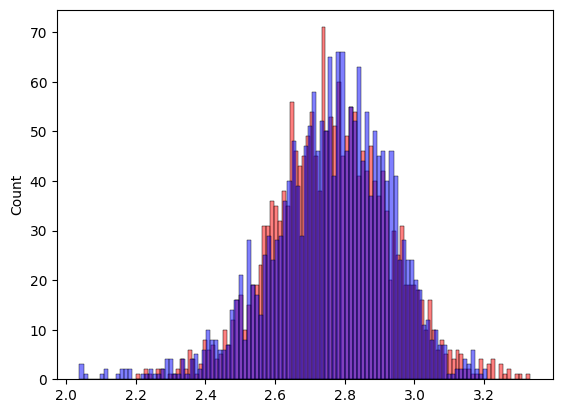

In [288]:
x_train_zero, x_val_zero, y_pred_zero = train(x_train, x_val, y_train, 0)
sns.histplot(y_pred_zero, color='red', alpha=0.5, bins=100)
sns.histplot(y_val, color='blue', alpha=0.5, bins=100)

<Axes: ylabel='Count'>

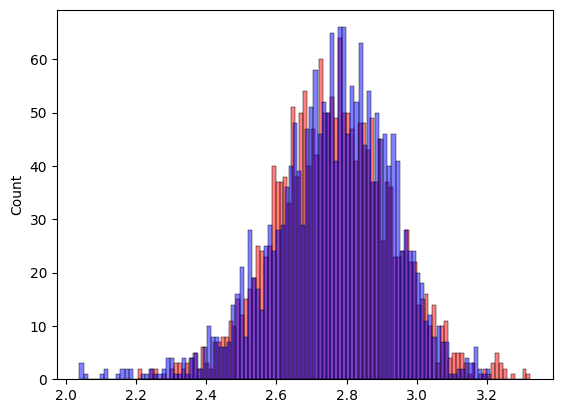

In [289]:
x_train_mean, x_val_mean, y_pred_mean = train(x_train, x_val, y_train, x_train.horsepower.mean())
sns.histplot(y_pred_mean, color='red', alpha=0.5, bins=100)
sns.histplot(y_val, color='blue', alpha=0.5, bins=100)

In [290]:
def rmse(y, y_pred):
    se = (y - y_pred) ** 2
    mse = se.mean()
    return np.sqrt(mse)

In [291]:
round(rmse(y_val, y_pred_zero),2)

np.float64(0.04)

In [292]:
round(rmse(y_val, y_pred_mean),2)

np.float64(0.04)

### Question 4

In [293]:
def train_linear_regression_reg(X, y, r = 0.001):
    ones = np.ones(X.shape[0])
    X = np.column_stack([ones, X])

    XTX = X.T.dot(X)
    XTX = XTX + r * np.eye(XTX.shape[0])
                           
    XTX_inv = np.linalg.inv(XTX)
    w_full = XTX_inv.dot(X.T).dot(y)
    
    return w_full[0], w_full[1:]

In [294]:
rmse_old = 0
rmse_best = 0
r_min = 0

for r in [0, 0.01, 0.1, 1, 5, 10, 100]:
    w0_zero, w_zero = train_linear_regression_reg(x_train_zero, y_train, r)
    y_pred_zero = w0_zero + x_val_zero.dot(w_zero)

    rmse_old = rmse(y_val, y_pred_zero)
    if rmse_best == 0:
        rmse_best = rmse_old

    if rmse_best == rmse_old and r_min > r:
        r_min = r
        
    if rmse_best > rmse_old:
        rmse_best = rmse_old

print(r_min)
print(rmse_best)

0
0.039977872016356164


### Question 5

In [295]:
rmse_values = np.array([])
for seed in [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]:
    data_shuffle(seed)
    y()
    x_train_zero, x_val_zero, y_pred_zero = train(x_train, x_val, y_train, 0)
    rmse_values = np.append(rmse_values, rmse(y_val, y_pred_zero))

std = np.std(rmse_values)
round(std,3)

np.float64(0.001)

### Question 6

In [296]:
data_shuffle(9)
y()

x_combined = pd.concat([x_train, x_val])
y_combined = np.concatenate([y_train, y_val])
x_combined = x_combined.reset_index(drop=True)

x_combined_zero, x_test_zero, y_pred_zero = train(x_combined, x_test, y_combined, 0)

w0_zero, w_zero = train_linear_regression_reg(x_combined_zero, y_combined, r = 0.001)

y_pred_zero = w0_zero + x_test_zero.dot(w_zero)

rmse(y_test, y_pred_zero)

np.float64(0.039196136444522876)